In [1]:
%matplotlib notebook
import os
import math
import time
from math import sqrt, pi
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pylab as plt
from scipy.stats import ttest_ind

import clustering_statistics as cs

import warnings
warnings.filterwarnings("ignore")

from ipyparallel import Client

In [37]:
root_dir = 'C:\\Users\\NIC ADMIN\\Documents\\atto647n pre-hawk\\'
folder = root_dir + 'processed\\voronoi_density20_min-samples50\\'

In [26]:
tnf_area = cs.mean_per_image(folder, 'wtTNF', 'area', 'image voronoi stats')

run01StormTableLeftB wtTNF_filtered_voronoi.xlsx
run02StormTableLeftB wtTNF_filtered_voronoi.xlsx
run03StormTableLeftB wtTNF_filtered_voronoi.xlsx
run05StormTableLeftB wtTNF_filtered_voronoi.xlsx
run06StormTableLeftB wtTNF_filtered_voronoi.xlsx
run07StormTableLeftB wtTNF_filtered_voronoi.xlsx
run08StormTableLeftB wtTNF_filtered_voronoi.xlsx
run09StormTableLeftB wtTNF_filtered_voronoi.xlsx
run10StormTableLeftB wtTNF_filtered_voronoi.xlsx


In [27]:
control_area = cs.mean_per_image(folder, 'control', 'area', 'image voronoi stats')

run11StormTableLeftB control_filtered_voronoi.xlsx
run12StormTableLeftB control_filtered_voronoi.xlsx
run13StormTableLeftB control_filtered_voronoi.xlsx
run14StormTableLeftB control_filtered_voronoi.xlsx
run15StormTableLeftB control_filtered_voronoi.xlsx
run16StormTableLeftB control_filtered_voronoi.xlsx
run17StormTableLeftB control_filtered_voronoi.xlsx
run18StormTableLeftB control_filtered_voronoi.xlsx
run19StormTableLeftB control_filtered_voronoi.xlsx
run20StormTableLeftB control_filtered_voronoi.xlsx


In [28]:
tnf_area

array([17416.17041563, 24583.94963544, 73288.82304439, 70842.52238337,
       38001.4882291 , 24198.2408899 , 53816.53611713, 34581.84472378,
       60739.59898805])

In [29]:
control_area

array([26649.77654579, 53795.37210386, 41902.05076643, 44189.91098696,
       35822.28682266, 26732.67648819, 50207.14488809, 69610.18174516,
       58076.6037739 , 30391.91605463])

<IPython.core.display.Javascript object>


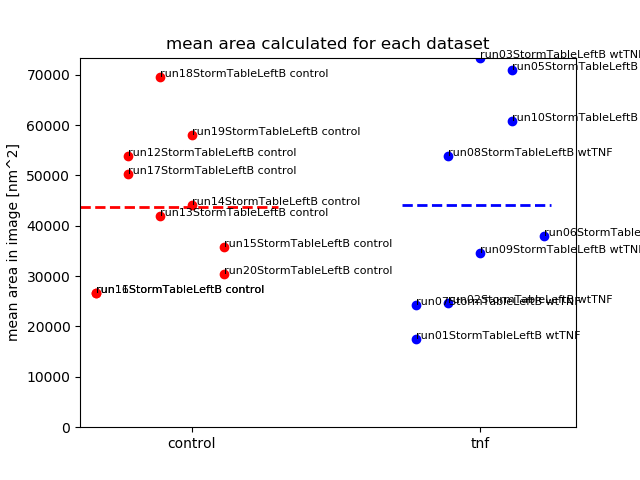

In [31]:
import math

control_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(control_area.shape[0]/5.0)))])
control_idx = control_idx[0:control_area.shape[0]]

tnf_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(tnf_area.shape[0]/5.0)))])
tnf_idx = tnf_idx[0:tnf_area.shape[0]] + 10

plt.figure()
plt.plot(control_idx, control_area,'ro',label='control')
c = 0
for filename in os.listdir(folder):
        if filename.endswith('xlsx') and ('control' in filename.lower()):
            idx = filename.index('_')
            shortname = filename[0:idx]
            plt.annotate('%s'%shortname,xy=(control_idx[c],control_area[c]),xycoords='data',size=8)
            c += 1
            
plt.plot(tnf_idx, tnf_area,'bo',label='tnf')
c = 0
for filename in os.listdir(folder):
        if filename.endswith('xlsx') and ('tnf' in filename.lower()):
            idx = filename.index('_')
            shortname = filename[0:idx]
            plt.annotate('%s'%shortname,xy=(tnf_idx[c],tnf_area[c]),xycoords='data',size=8)
            c += 1
            
# tnf_area_or = np.delete(tnf_area, [10,13], axis=0)
tnf_area_or = tnf_area
tnf_mean_area = np.mean(tnf_area_or)
tnf_sem = np.std(tnf_area_or)/np.sqrt(tnf_area_or.shape[0])

# control_area_or = np.delete(control_area, [11,13], axis=0)
control_area_or = control_area
control_mean_area = np.mean(control_area_or)
control_sem = np.std(control_area_or)/np.sqrt(control_area_or.shape[0])

plotmax = max(np.max(control_area), np.max(tnf_area))+100

plt.axhline(control_mean_area,xmin=0.0,xmax=0.4,linewidth=2,linestyle='--',color='r')
plt.axhline(tnf_mean_area,xmin=0.65,xmax=0.95,linewidth=2,linestyle='--',color='b')
plt.xticks((3,12),('control','tnf'))
plt.ylabel('mean area in image [nm^2]')
plt.xlim([-0.5,15])
plt.ylim([0,plotmax])
plt.title('mean area calculated for each dataset')
plt.savefig(root_dir + 'processed\\voronoi_density90_min-samples50\\mean_area.png')
plt.show()

<IPython.core.display.Javascript object>


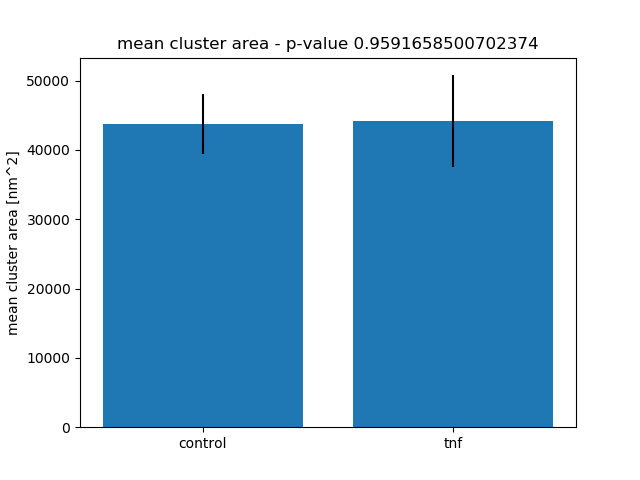

In [32]:
#everything
tnf_mean_area = np.mean(tnf_area)
tnf_sem = np.std(tnf_area)/np.sqrt(tnf_area.shape[0])

control_mean_area = np.mean(control_area)
control_sem = np.std(control_area)/np.sqrt(control_area.shape[0])

pvalue = ttest_ind(tnf_area, control_area)[1]

plt.figure()
ind = np.arange(2)
width = 1
plt.bar(ind, (control_mean_area, tnf_mean_area), align='center', yerr=(control_sem, tnf_sem))
plt.xticks(ind)
plt.gca().set_xticklabels(('control', 'tnf'))
plt.ylabel('mean cluster area [nm^2]')
plt.title('mean cluster area - p-value %s'%pvalue)
plt.savefig(root_dir + 'processed\\voronoi_density90_min-samples50\\mean_area_bar.png')
plt.show()

In [38]:
tnf_occupancy = cs.mean_per_image(folder, 'wtTNF', 'occupancy', 'image voronoi stats')

control_occupancy = cs.mean_per_image(folder, 'control', 'occupancy', 'image voronoi stats')

run01StormTableLeftB wtTNF_filtered_voronoi.xlsx
run02StormTableLeftB wtTNF_filtered_voronoi.xlsx
run03StormTableLeftB wtTNF_filtered_voronoi.xlsx
run05StormTableLeftB wtTNF_filtered_voronoi.xlsx
run06StormTableLeftB wtTNF_filtered_voronoi.xlsx
run07StormTableLeftB wtTNF_filtered_voronoi.xlsx
run08StormTableLeftB wtTNF_filtered_voronoi.xlsx
run09StormTableLeftB wtTNF_filtered_voronoi.xlsx
run10StormTableLeftB wtTNF_filtered_voronoi.xlsx
run11StormTableLeftB control_filtered_voronoi.xlsx
run12StormTableLeftB control_filtered_voronoi.xlsx
run13StormTableLeftB control_filtered_voronoi.xlsx
run14StormTableLeftB control_filtered_voronoi.xlsx
run15StormTableLeftB control_filtered_voronoi.xlsx
run16StormTableLeftB control_filtered_voronoi.xlsx
run17StormTableLeftB control_filtered_voronoi.xlsx
run18StormTableLeftB control_filtered_voronoi.xlsx
run19StormTableLeftB control_filtered_voronoi.xlsx
run20StormTableLeftB control_filtered_voronoi.xlsx


<IPython.core.display.Javascript object>


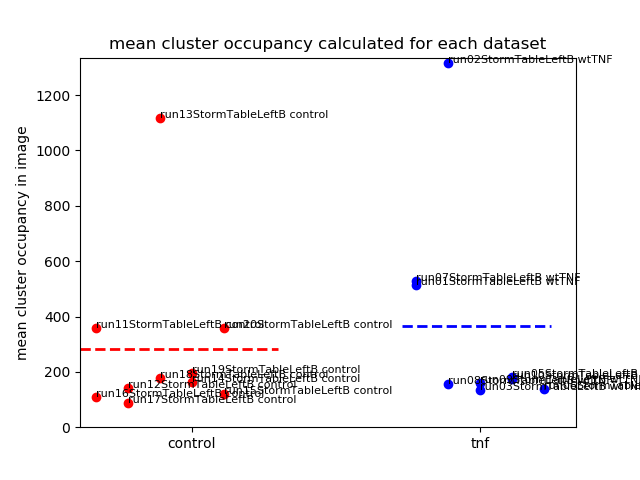

In [39]:
import math

control_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(control_occupancy.shape[0]/5.0)))])
control_idx = control_idx[0:control_occupancy.shape[0]]

tnf_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(tnf_occupancy.shape[0]/5.0)))])
tnf_idx = tnf_idx[0:tnf_occupancy.shape[0]] + 10

plt.figure()
plt.plot(control_idx, control_occupancy,'ro',label='control')
c = 0
for filename in os.listdir(folder):
        if filename.endswith('xlsx') and ('control' in filename.lower()):
            idx = filename.index('_')
            shortname = filename[0:idx]
            plt.annotate('%s'%shortname,xy=(control_idx[c],control_occupancy[c]),xycoords='data',size=8)
            c += 1
            
plt.plot(tnf_idx, tnf_occupancy,'bo',label='tnf')
c = 0
for filename in os.listdir(folder):
        if filename.endswith('xlsx') and ('tnf' in filename.lower()):
            idx = filename.index('_')
            shortname = filename[0:idx]
            plt.annotate('%s'%shortname,xy=(tnf_idx[c],tnf_occupancy[c]),xycoords='data',size=8)
            c += 1
            
#tnf_occupancy_or = np.delete(tnf_occupancy, [0,1,2], axis=0)
tnf_occupancy_or = tnf_occupancy
tnf_mean_occupancy = np.mean(tnf_occupancy_or)
tnf_occupancy_sem = np.std(tnf_occupancy_or)/np.sqrt(tnf_occupancy_or.shape[0])

#control_occupancy_or = np.delete(control_occupancy, [11,13], axis=0)
control_occupancy_or = control_occupancy
control_mean_occupancy = np.mean(control_occupancy_or)
control_occupancy_sem = np.std(control_occupancy_or)/np.sqrt(control_occupancy_or.shape[0])

plotmax = max(np.max(control_occupancy), np.max(tnf_occupancy))+20

plt.axhline(control_mean_occupancy,xmin=0.0,xmax=0.4,linewidth=2,linestyle='--',color='r')
plt.axhline(tnf_mean_occupancy,xmin=0.65,xmax=0.95,linewidth=2,linestyle='--',color='b')
plt.xticks((3,12),('control','tnf'))
plt.ylabel('mean cluster occupancy in image')
plt.xlim([-0.5,15])
plt.ylim([0,plotmax])
plt.title('mean cluster occupancy calculated for each dataset')
plt.savefig(root_dir + 'processed\\voronoi_density20_min-samples50\\mean_occupancy.png')
plt.show()

<IPython.core.display.Javascript object>


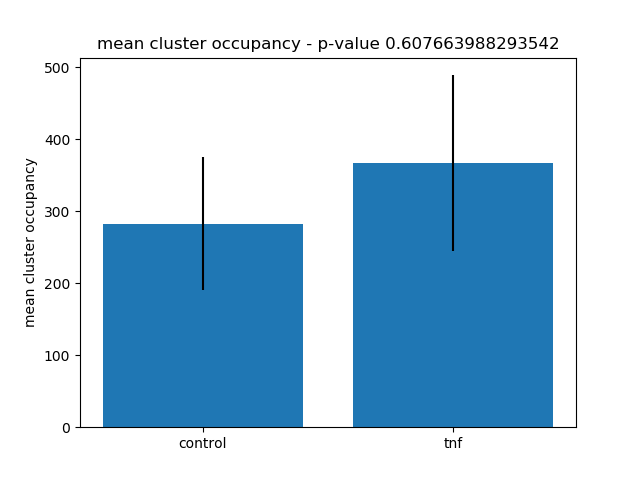

In [40]:
tnf_mean_occupancy = np.mean(tnf_occupancy)
tnf_occupancy_sem = np.std(tnf_occupancy)/np.sqrt(tnf_occupancy.shape[0])

control_mean_occupancy = np.mean(control_occupancy)
control_occupancy_sem = np.std(control_occupancy)/np.sqrt(control_occupancy.shape[0])

pvalue = ttest_ind(tnf_occupancy, control_occupancy)[1]

plt.figure()
ind = np.arange(2)
width = 1
plt.bar(ind, (control_mean_occupancy, tnf_mean_occupancy), yerr=(control_occupancy_sem, tnf_occupancy_sem))
plt.xticks(ind)
plt.gca().set_xticklabels(('control', 'tnf'))
plt.ylabel('mean cluster occupancy')
plt.title('mean cluster occupancy - p-value %s'%pvalue)
plt.savefig(root_dir + 'processed\\voronoi_density20_min-samples50\\mean_occupancy_bar.png')
plt.show()

In [ ]:
tnf_nn = cs.mean_near_neighbour_distance(folder, 'wtTNF')
control_nn = cs.mean_near_neighbour_distance(folder, 'control')

run01StormTableLeftB wtTNF_filtered_optics.xlsx
run02StormTableLeftB wtTNF_filtered_optics.xlsx
run03StormTableLeftB wtTNF_filtered_optics.xlsx
run05StormTableLeftB wtTNF_filtered_optics.xlsx
run06StormTableLeftB wtTNF_filtered_optics.xlsx
run07StormTableLeftB wtTNF_filtered_optics.xlsx
run08StormTableLeftB wtTNF_filtered_optics.xlsx
run09StormTableLeftB wtTNF_filtered_optics.xlsx
run10StormTableLeftB wtTNF_filtered_optics.xlsx
run11StormTableLeftB control_filtered_optics.xlsx


<IPython.core.display.Javascript object>


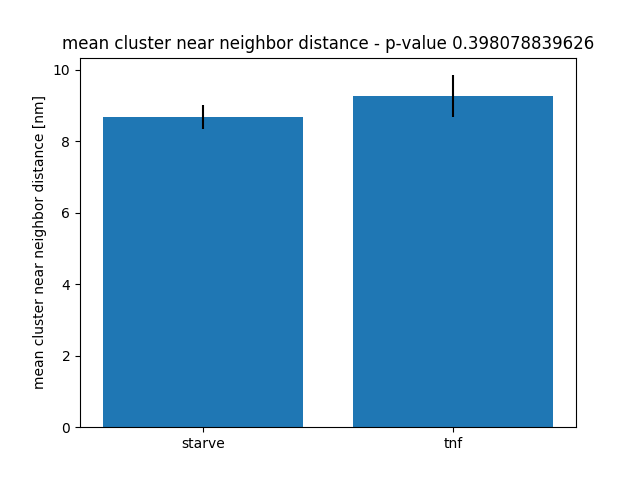

In [26]:
tnf_mean_nn = np.mean(tnf_nn)
tnf_nn_sem = np.std(tnf_nn)/np.sqrt(tnf_nn.shape[0])

control_mean_nn = np.mean(control_nn)
control_nn_sem = np.std(control_nn)/np.sqrt(control_nn.shape[0])

pvalue = ttest_ind(tnf_nn, control_nn)[1]

plt.figure()
ind = np.arange(2)
width = 1
plt.bar(ind, (control_mean_nn, tnf_mean_nn), yerr=(control_nn_sem, tnf_nn_sem))
plt.xticks(ind)
plt.gca().set_xticklabels(('control', 'tnf'))
plt.ylabel('mean cluster near neighbor distance [nm]')
plt.title('mean cluster near neighbor distance - p-value %s'%pvalue)
plt.savefig(root_dir + 'processed\\mean_near_neighbour_distance.png')
plt.show()

<IPython.core.display.Javascript object>


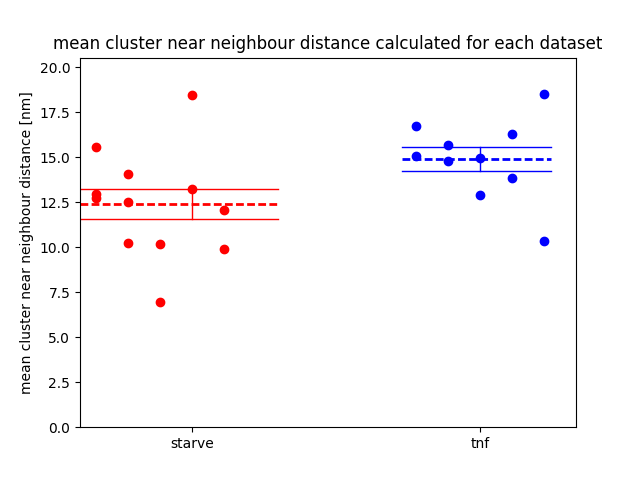

In [26]:
# only plot data with outliers removed

tnf_nn_or = np.delete(tnf_nn, [0,1,2], axis=0)
# tnf_nn_or = tnf_nn
tnf_mean_nn = np.mean(tnf_nn_or)
tnf_nn_sem = np.std(tnf_nn_or)/np.sqrt(tnf_nn_or.shape[0])

starve_nn_or = np.delete(starve_nn, [11,13], axis=0)
# starve_nn_or = starve_nn
starve_mean_nn = np.mean(starve_nn_or)
starve_nn_sem = np.std(starve_nn_or)/np.sqrt(starve_nn_or.shape[0])

starve_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(starve_nn_or.shape[0]/5.0)))])
starve_idx = starve_idx[0:starve_nn_or.shape[0]]

tnf_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(tnf_nn_or.shape[0]/5.0)))])
tnf_idx = tnf_idx[0:tnf_nn_or.shape[0]] + 10

plt.figure()
plt.plot(starve_idx, starve_nn_or,'ro',label='starve')           
plt.plot(tnf_idx, tnf_nn_or,'bo',label='tnf')

plotmax = max(np.max(starve_nn_or), np.max(tnf_nn_or))+2
starve_ymin = (starve_mean_nn - starve_nn_sem) / plotmax
starve_ymax = (starve_mean_nn + starve_nn_sem) / plotmax
tnf_ymin = (tnf_mean_nn - tnf_nn_sem) / plotmax
tnf_ymax = (tnf_mean_nn + tnf_nn_sem) / plotmax

# mean
plt.axhline(starve_mean_nn,xmin=0.0,xmax=0.4,linewidth=2,linestyle='--',color='r')
plt.axhline(tnf_mean_nn,xmin=0.65,xmax=0.95,linewidth=2,linestyle='--',color='b')

# sem
plt.axvline(3, ymin=starve_ymin, ymax=starve_ymax,linewidth=1,color='r')
plt.axvline(12, ymin=tnf_ymin, ymax=tnf_ymax,linewidth=1,color='b')
plt.axhline(starve_mean_nn+starve_nn_sem,xmin=0.0,xmax=0.4,linewidth=1,color='r')
plt.axhline(starve_mean_nn-starve_nn_sem,xmin=0.0,xmax=0.4,linewidth=1,color='r')
plt.axhline(tnf_mean_nn+tnf_nn_sem,xmin=0.65,xmax=0.95,linewidth=1,color='b')
plt.axhline(tnf_mean_nn-tnf_nn_sem,xmin=0.65,xmax=0.95,linewidth=1,color='b')

plt.xticks((3,12),('starve','tnf'))
plt.ylabel('mean cluster near neighbour distance [nm]')
plt.xlim([-0.5,15])
plt.ylim([0,plotmax])
plt.title('mean cluster near neighbour distance calculated for each dataset')
plt.show()

In [27]:
tnf_pc = cs.mean_per_image(folder, 'tnf', 'pc_ratio')
starve_pc = cs.mean_per_image(folder, 'starve', 'pc_ratio')

5min_TNF1 filtered only_TS2D_optics.xlsx
tnf 12_filtered only_TS2D_optics.xlsx
tnf 11_filtered only_TS2D_optics.xlsx
WT 5min TNF 7_filtered only_TS2D_optics.xlsx
WT 5min TNF 6_filtered only_TS2D_optics.xlsx
WT 5min TNF 9_filtered only_TS2D_optics.xlsx
5min TNF 4_filtered only_TS2D_optics.xlsx
5min_TNF3 filtered only_TS2D_optics.xlsx
5min TNF 3 _filtered only_TS2D_optics.xlsx
WT 5min TNF 8_filtered only_TS2D_optics.xlsx
5min_TNF5 filtered only_TS2D_optics.xlsx
WT 5min TNF 5_filtered only_TS2D_optics.xlsx
tnf 10_filtered only_TS2D_optics.xlsx
starve 10_filtered only_TS2D_optics.xlsx
starve1 filtered only_TS2D_optics.xlsx
starve4 fitlered only_TS2D_optics.xlsx
starve 4_list filtered only_TS2D_optics.xlsx
starve 11_filtered only_TS2D_optics.xlsx
starve3 filtered only_TS2D_optics.xlsx
starve 5_list filtered only_TS2D_optics.xlsx
starve 7_filtered only_TS2D_optics.xlsx
starve5 filtered only_TS2D_optics.xlsx
starve 8_filtered only_TS2D_optics.xlsx
starve 6 filtered only 5int_TS2D_optics.xlsx


[  3.77482262   3.611386     3.85273877   5.31313751   4.95500984
  12.84174065   2.910105     7.99051834   5.5705412    3.92801901
  13.77716501   3.43598017  29.38146184  13.36258992]


<IPython.core.display.Javascript object>


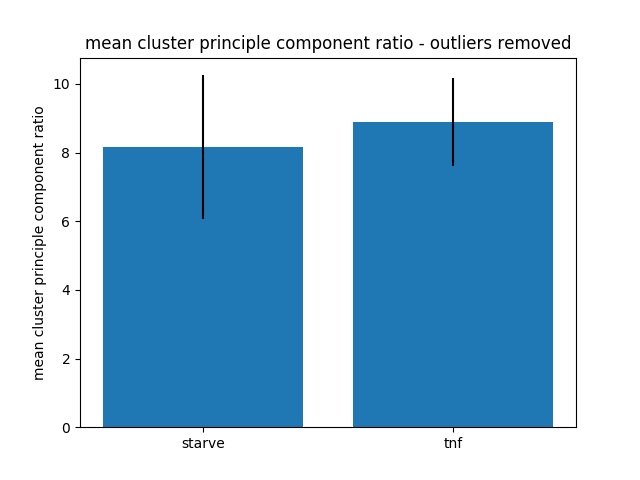

In [32]:
# remove outliers
tnf_pc_or = np.delete(tnf_pc, [0,1,2], axis=0)
tnf_pc_mean = np.mean(tnf_pc_or)
tnf_pc_sem = np.std(tnf_pc_or)/np.sqrt(tnf_pc_or.shape[0])

starve_pc_or = np.delete(starve_pc, [11,13], axis=0)
starve_pc_mean = np.mean(starve_pc_or)
starve_pc_sem = np.std(starve_pc_or)/np.sqrt(starve_pc_or.shape[0])
print(starve_pc)
plt.figure()
ind = np.arange(2)
width = 1
plt.bar(ind, (starve_pc_mean, tnf_pc_mean), yerr=(starve_pc_sem, tnf_pc_sem))
plt.xticks(ind + width / 2)
plt.gca().set_xticklabels(('starve', 'tnf'))
plt.ylabel('mean cluster principle component ratio')
plt.title('mean cluster principle component ratio - outliers removed')
plt.show()

<IPython.core.display.Javascript object>


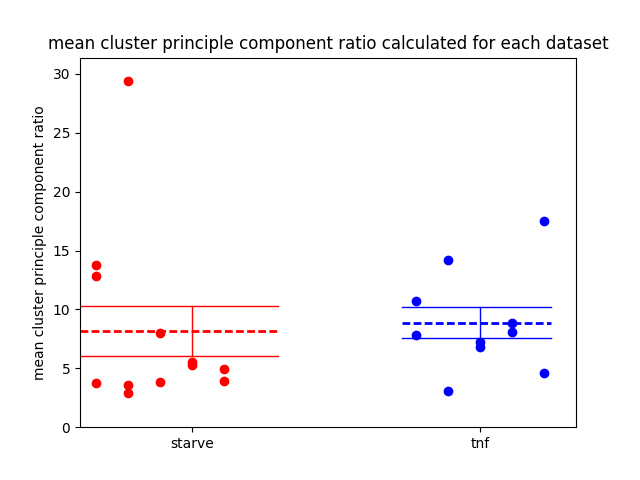

In [30]:
starve_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(starve_pc_or.shape[0]/5.0)))])
starve_idx = starve_idx[0:starve_pc_or.shape[0]]

tnf_idx = np.concatenate([np.arange(5) for i in range(int(math.ceil(tnf_pc_or.shape[0]/5.0)))])
tnf_idx = tnf_idx[0:tnf_pc_or.shape[0]] + 10

plt.figure()
plt.plot(starve_idx, starve_pc_or,'ro',label='starve')           
plt.plot(tnf_idx, tnf_pc_or,'bo',label='tnf')

plotmax = max(np.max(starve_pc_or), np.max(tnf_pc_or))+2
starve_ymin = (starve_pc_mean - starve_pc_sem) / plotmax
starve_ymax = (starve_pc_mean + starve_pc_sem) / plotmax
tnf_ymin = (tnf_pc_mean - tnf_pc_sem) / plotmax
tnf_ymax = (tnf_pc_mean + tnf_pc_sem) / plotmax

# mean
plt.axhline(starve_pc_mean,xmin=0.0,xmax=0.4,linewidth=2,linestyle='--',color='r')
plt.axhline(tnf_pc_mean,xmin=0.65,xmax=0.95,linewidth=2,linestyle='--',color='b')

# sem
plt.axvline(3, ymin=starve_ymin, ymax=starve_ymax,linewidth=1,color='r')
plt.axvline(12, ymin=tnf_ymin, ymax=tnf_ymax,linewidth=1,color='b')
plt.axhline(starve_pc_mean+starve_pc_sem,xmin=0.0,xmax=0.4,linewidth=1,color='r')
plt.axhline(starve_pc_mean-starve_pc_sem,xmin=0.0,xmax=0.4,linewidth=1,color='r')
plt.axhline(tnf_pc_mean+tnf_pc_sem,xmin=0.65,xmax=0.95,linewidth=1,color='b')
plt.axhline(tnf_pc_mean-tnf_pc_sem,xmin=0.65,xmax=0.95,linewidth=1,color='b')

plt.xticks((3,12),('starve','tnf'))
plt.ylabel('mean cluster principle component ratio')
plt.xlim([-0.5,15])
plt.ylim([0,plotmax])
plt.title('mean cluster principle component ratio calculated for each dataset')
plt.show()